https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview

<img src="timeline.png"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import *

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
train_data = train_data.drop('key', axis=1)
submission_key = test_data['key']

In [5]:
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])

In [6]:
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
train_data.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [8]:
weekday_names = {0: 'Sunday',
                 1: 'Monday',
                 2: 'Tuesday',
                 3: 'Wednesday',
                 4: 'Thursday',
                 5: 'Friday',
                 6: 'Saturday'}

In [9]:
train_data['weekday_name'] = train_data['pickup_datetime'].dt.weekday.map(weekday_names)

In [10]:
train_data['Hour'] = train_data['pickup_datetime'].dt.hour
train_data['Month'] = train_data['pickup_datetime'].dt.month
train_data['Year'] = train_data['pickup_datetime'].dt.year

In [11]:
weekday_names_encode = {'Sunday': 1,
                        'Saturday': 2,
                        'Monday': 3,
                        'Tuesday': 4,
                        'Friday': 5,
                        'Wednesday': 6,
                        'Thursday': 7}

In [12]:
train_data['weekday_name'] = train_data['weekday_name'].map(weekday_names_encode)

In [13]:
train_data = train_data.drop('pickup_datetime', axis=1)

In [14]:
train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday_name,Hour,Month,Year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1,17,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,3,16,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,6,0,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,5,4,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,3,7,3,2010


In [15]:
def distance(lat1, lon1, lat2, lon2):

    dLat = (lat2 - lat1) * pi / 180
    dLon = (lon2 - lon1) * pi / 180
    
    lat1 = lat1 * pi / 180
    lat2 = lat2 * pi / 180
    
    a = (pow(sin(dLat / 2), 2) + pow(sin(dLon / 2), 2) * cos(lat1) * cos(lat2))
    rad = 6371
    c = 2 * asin(sqrt(a))
    return  round(rad * c, 3)

In [16]:
dist = []
for i in range(train_data.shape[0]):
    dist.append(distance(train_data['pickup_latitude'][i],
                      train_data['pickup_longitude'][i],
                      train_data['dropoff_latitude'][i],
                      train_data['dropoff_longitude'][i]))

In [17]:
train_data['distance_km'] = dist

In [18]:
train_data['diff_longitude'] = abs(train_data.pickup_longitude - train_data.dropoff_longitude)
train_data['diff_latitude'] = abs(train_data.pickup_latitude - train_data.dropoff_latitude)

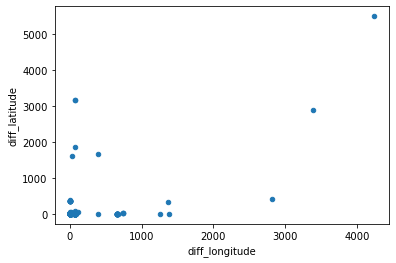

In [19]:
train_data.plot.scatter('diff_longitude', 'diff_latitude')

In [20]:
train_data = train_data[(train_data['diff_longitude'] < 1.5) & (train_data['diff_latitude'] < 1.5)]

In [21]:
train_data = train_data[(train_data['passenger_count'] < 8) & (train_data['passenger_count'] > 0)]

In [22]:
train_data = train_data[(train_data['fare_amount'] < train_data.fare_amount.quantile(0.999)) & (train_data['fare_amount'] > 0)]

In [23]:
train_data.fare_amount.quantile(0.999)

65.1

In [24]:
train_data.shape

(1041684, 13)

In [25]:
train_data.passenger_count.value_counts()

1    722723
2    154792
5     73934
3     45788
4     22353
6     22094
Name: passenger_count, dtype: int64

In [26]:
train_data.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)

In [27]:
train_data.rename(columns={'weekday_name':'weekday_number'}, inplace=True)

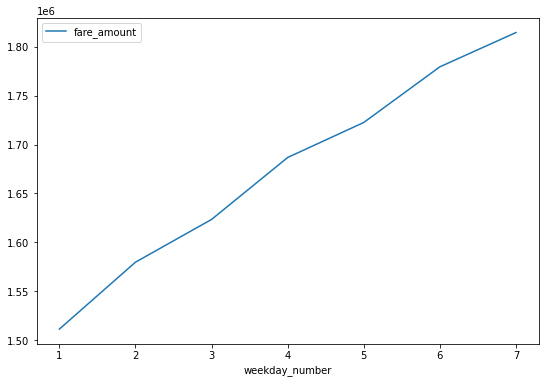

In [28]:
train_data.groupby(['weekday_number']).aggregate({'fare_amount':'sum'}).plot(figsize=(9, 6))

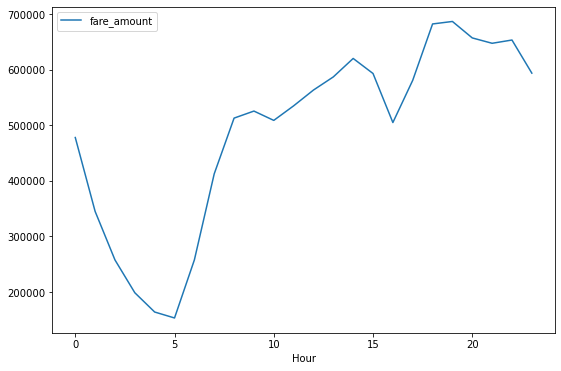

In [29]:
train_data.groupby(['Hour']).aggregate({'fare_amount':'sum'}).plot(figsize=(9, 6))

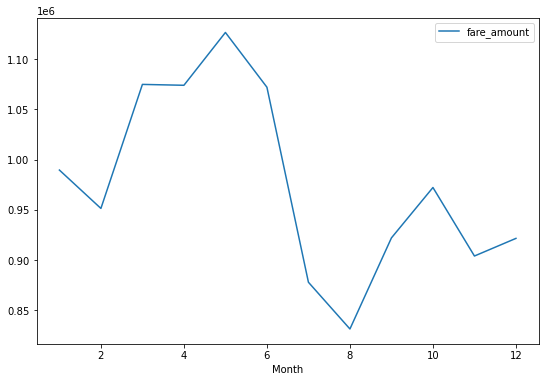

In [30]:
train_data.groupby(['Month']).aggregate({'fare_amount':'sum'}).plot(figsize=(9, 6))

In [31]:
train_data.head()

,fare_amount,passenger_count,weekday_number,Hour,Month,Year,distance_km,diff_longitude,diff_latitude
0,4.5,1,1,17,6,2009,1.031,0.002701,0.009041
1,16.9,1,3,16,1,2010,8.450,0.036780,0.070701
2,5.7,2,6,0,8,2011,1.390,0.008504,0.010708
3,7.7,1,5,4,4,2012,2.799,0.004437,0.024949
4,5.3,1,3,7,3,2010,1.999,0.011440,0.015754


In [32]:
train_data.sort_values('distance_km', ascending=False).head()

,fare_amount,passenger_count,weekday_number,Hour,Month,Year,distance_km,diff_longitude,diff_latitude
866707,28.5,1,6,10,3,2011,177.894,1.445223,1.157910
846625,26.9,1,4,18,4,2011,176.884,1.454675,1.138519
73775,10.1,1,6,22,11,2010,174.808,0.906090,1.410595
339110,24.9,1,4,13,4,2011,173.852,1.451429,1.102929
139903,30.1,1,5,19,3,2011,173.707,1.383443,1.150501


In [33]:
train_data.diff_longitude.max()

1.486975000000001

In [34]:
train_data.drop(['diff_longitude', 'diff_latitude'], axis=1, inplace=True)

In [35]:
train_data.head()

,fare_amount,passenger_count,weekday_number,Hour,Month,Year,distance_km
0,4.5,1,1,17,6,2009,1.031
1,16.9,1,3,16,1,2010,8.450
2,5.7,2,6,0,8,2011,1.390
3,7.7,1,5,4,4,2012,2.799
4,5.3,1,3,7,3,2010,1.999


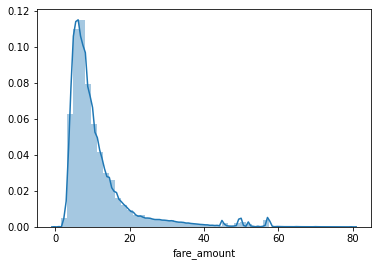

In [36]:
sns.distplot(train_data['fare_amount'])

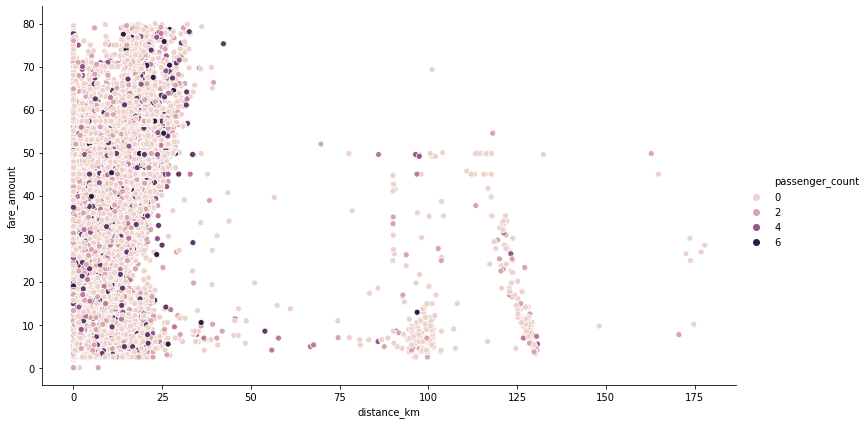

In [37]:
sns.relplot(data = train_data, kind = 'scatter', x = 'distance_km', y = 'fare_amount',
            hue = 'passenger_count', height=6, aspect=1.75)

In [38]:
train_data.sort_values('fare_amount', ascending=True).head()

,fare_amount,passenger_count,weekday_number,Hour,Month,Year,distance_km
1046339,0.01,2,1,21,1,2015,0.004
2780,0.01,1,7,15,5,2015,0.222
194169,0.01,2,7,15,2,2015,6.975
90010,0.01,1,6,6,2,2015,0.171
281142,0.01,1,1,21,4,2015,0.000


In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [40]:
train_data.shape

(1041684, 7)

In [41]:
X = train_data.drop('fare_amount', axis=1)
y = train_data['fare_amount']

In [42]:
y.shape

(1041684,)

In [43]:
X_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)

In [44]:
rf_reg = RandomForestRegressor(random_state=0, n_estimators=100)

In [45]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [46]:
rf_pred = rf_reg.predict(x_valid)

In [47]:
mean_squared_error(rf_pred, y_valid, squared=False)

4.324073559866582

In [48]:
knn_reg = KNeighborsRegressor(n_neighbors=70)

In [49]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=70)

In [50]:
knn_pred = knn_reg.predict(x_valid)

In [51]:
mean_squared_error(knn_pred, y_valid, squared=False)

4.22093651231241

In [52]:
xgb_reg = XGBRegressor(n_estimators=700, learning_rate=0.01)

In [53]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
xgb_pred = xgb_reg.predict(x_valid)

In [55]:
mean_squared_error(xgb_pred, y_valid, squared=False)

4.033800970711454

In [56]:
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [57]:
submission_key = test_data['key']
test_data = test_data.drop('key', axis=1)

In [58]:
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])

In [59]:
weekday_names = {0: 'Sunday',
                 1: 'Monday',
                 2: 'Tuesday',
                 3: 'Wednesday',
                 4: 'Thursday',
                 5: 'Friday',
                 6: 'Saturday'}

In [60]:
test_data['weekday_name'] = test_data['pickup_datetime'].dt.weekday.map(weekday_names)

In [61]:
test_data['Hour'] = test_data['pickup_datetime'].dt.hour
test_data['Month'] = test_data['pickup_datetime'].dt.month
test_data['Year'] = test_data['pickup_datetime'].dt.year

In [62]:
weekday_names_encode = {'Sunday': 1,
                        'Saturday': 2,
                        'Monday': 3,
                        'Tuesday': 4,
                        'Friday': 5,
                        'Wednesday': 6,
                        'Thursday': 7}

In [63]:
test_data['weekday_name'] = test_data['weekday_name'].map(weekday_names_encode)

In [64]:
test_data = test_data.drop('pickup_datetime', axis=1)

In [65]:
test_dist = []
for i in range(test_data.shape[0]):
    test_dist.append(distance(test_data['pickup_latitude'][i],
                      test_data['pickup_longitude'][i],
                      test_data['dropoff_latitude'][i],
                      test_data['dropoff_longitude'][i]))

In [66]:
test_data['distance_km'] = test_dist

In [67]:
test_data['diff_longitude'] = abs(test_data.pickup_longitude - test_data.dropoff_longitude)
test_data['diff_latitude'] = abs(test_data.pickup_latitude - test_data.dropoff_latitude)

In [68]:
test_data = test_data[(test_data['diff_longitude'] < 1.5) & (test_data['diff_latitude'] < 1.5)]

In [69]:
test_data = test_data[(test_data['passenger_count'] < 8) & (test_data['passenger_count'] > 0)]

In [70]:
test_data.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)

In [71]:
test_data.rename(columns={'weekday_name':'weekday_number'}, inplace=True)

In [72]:
test_data.drop(['diff_longitude', 'diff_latitude'], axis=1, inplace=True)

In [73]:
test_data.head()

,passenger_count,weekday_number,Hour,Month,Year,distance_km
0,1,3,13,1,2015,2.323
1,1,3,13,1,2015,2.425
2,1,5,11,10,2011,0.619
3,1,5,21,12,2012,1.961
4,1,5,21,12,2012,5.387


In [74]:
xgb_test_pred = xgb_reg.predict(test_data)

In [75]:
output = pd.DataFrame({'key': submission_key,
                       'fare_amount': xgb_test_pred})

In [76]:
output.shape

(9914, 2)

In [77]:
output.to_csv('my_submission.csv', index=False)

<img src="nyc_taxi_submission_1.png"/>